In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

In [254]:
df=pd.read_csv('./movies.csv')
df.shape

(10866, 21)

In [255]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [256]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [257]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [258]:
df.drop(columns=['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)

In [259]:
df.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [260]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [261]:
df.dropna(how='any', subset=['director', 'genres'], inplace=True)

In [262]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                   0
keywords                1449
runtime                    0
genres                     0
production_companies     994
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [263]:
df['production_companies']=df['production_companies'].fillna(0)
df['keywords']=df['keywords'].fillna(0)

In [264]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [265]:
df.insert(3, 'profit', df.revenue - df.budget)

In [266]:
df.insert(4, 'roi', df.profit / df.budget)

In [267]:
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [268]:
df['popularity']=df['popularity'].round(2)
df['roi']=df['roi'].round(2)

In [269]:
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [270]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
roi                     4641
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [271]:
df.roi.value_counts()

roi
-1.00     1350
 inf       995
-0.99       29
-0.98       27
-0.38       21
          ... 
 4.15        1
 24.90       1
 2.32        1
 6.24        1
 6.62        1
Name: count, Length: 1075, dtype: int64

In [272]:
df['roi']=df['roi'].replace([np.inf, -np.inf], np.nan)

In [273]:
df.roi.value_counts()

roi
-1.00     1350
-0.99       29
-0.98       27
-0.38       21
 0.20       19
          ... 
 4.15        1
 24.90       1
 2.32        1
 6.24        1
 6.62        1
Name: count, Length: 1074, dtype: int64

__Top 10 Most Popular Movies__

In [274]:
most_pop_movies_10 = df.groupby(['original_title'])['popularity'].sum().sort_values(ascending=False).head(10)
most_pop_movies_10


original_title
Jurassic World                           32.99
Mad Max: Fury Road                       28.42
Interstellar                             24.95
Guardians of the Galaxy                  14.31
Insurgent                                13.11
Captain America: The Winter Soldier      12.97
Star Wars                                12.04
John Wick                                11.42
Star Wars: The Force Awakens             11.17
The Hunger Games: Mockingjay - Part 1    10.74
Name: popularity, dtype: float64

__Top 10 Most Budget Films__

In [275]:
most_budget_movies_10 = df.groupby(['original_title'])['budget'].sum().sort_values(ascending=False).head(10)
most_budget_movies_10

original_title
The Warrior's Way                              425000000
Pirates of the Caribbean: On Stranger Tides    380000000
Pirates of the Caribbean: At World's End       300000000
Godzilla                                       290000000
Avengers: Age of Ultron                        280000000
The Avengers                                   280000000
Superman Returns                               270000000
Tangled                                        260000000
John Carter                                    260000000
Spider-Man 3                                   258000000
Name: budget, dtype: int64

__Top 10 Movies by Revenue__

In [276]:
most_revenue_movies_10 = df.groupby(['original_title'])['revenue'].sum().sort_values(ascending=False).head(10)
most_revenue_movies_10

original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1568080742
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Frozen                                          1277284869
Iron Man 3                                      1215439994
Name: revenue, dtype: int64

__Top 10 Movies by Profit__

In [277]:
most_profit_movies_10 = df.groupby(['original_title'])['profit'].sum().sort_values(ascending=False).head(10)
most_profit_movies_10

original_title
Avatar                                          2544505847
Star Wars: The Force Awakens                    1868178225
Titanic                                         1632034188
Jurassic World                                  1363528810
Furious 7                                       1316249360
The Avengers                                    1288080742
Harry Potter and the Deathly Hallows: Part 2    1202817822
Frozen                                          1127284869
Avengers: Age of Ultron                         1125035767
The Net                                         1084279658
Name: profit, dtype: int64

In [278]:
df1=df[['popularity', 'budget', 'revenue', 'profit', 'roi', 'vote_count', 'vote_average', 'release_year']]

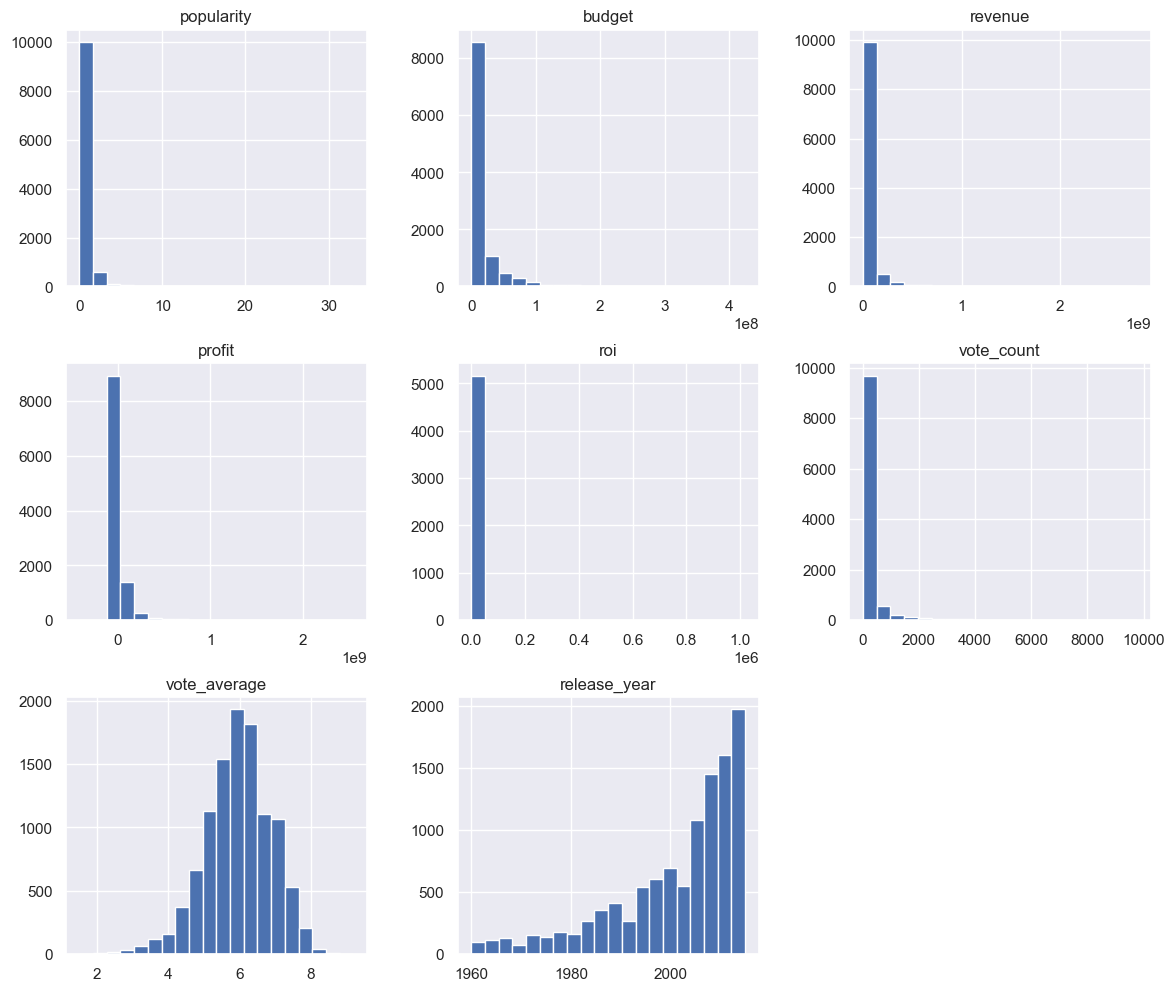

In [279]:
df1.hist(bins=20, figsize=(14, 12))
plt.show()

__Top 5 Production Companies That Made Most Revenue__

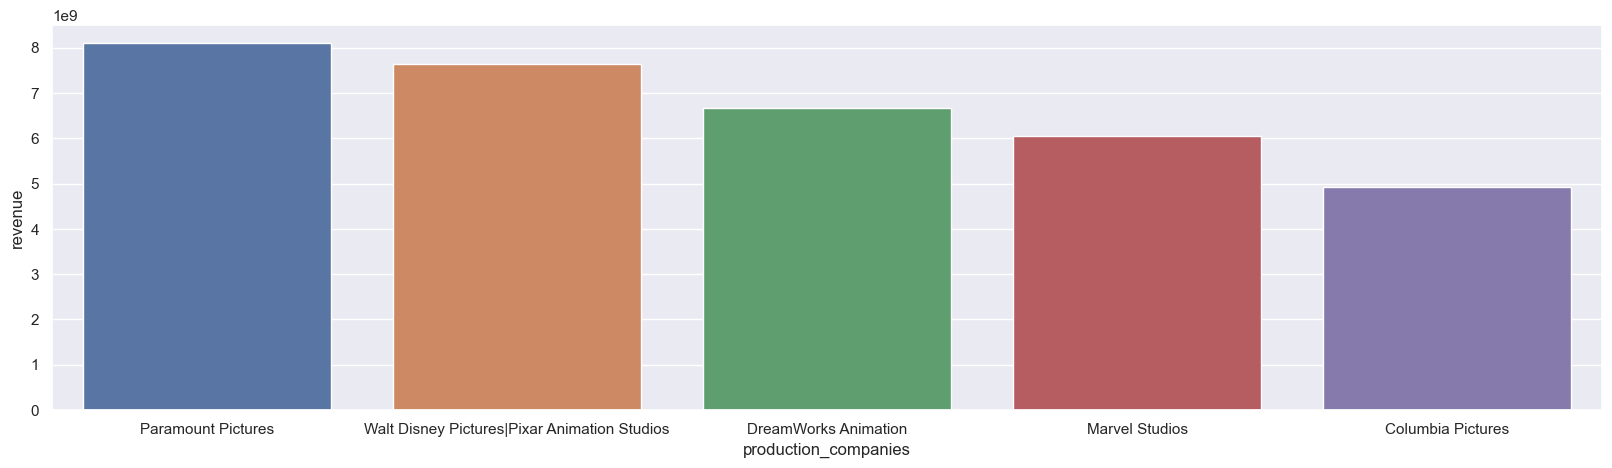

In [280]:
best_production_companies=df.groupby(['production_companies'], as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False).head(5)
sb.set(rc={'figure.figsize':(20, 5)})
sb.barplot(data=best_production_companies, x='production_companies', y='revenue')
plt.show()

Text(0, 0.5, 'popularity')

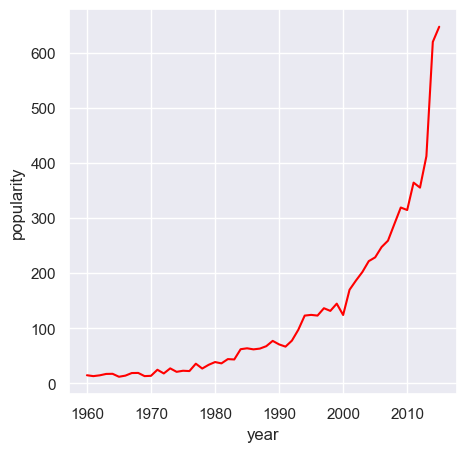

In [281]:
yoy_popularity=df.groupby(['release_year'],)['popularity'].sum()
sb.set(rc={'figure.figsize':(5, 5)})
yoy_popularity.plot(kind='line', color='red')
plt.xlabel('year')
plt.ylabel('popularity')

*The above figure shows that popularity of movies is growing over the period of time.*

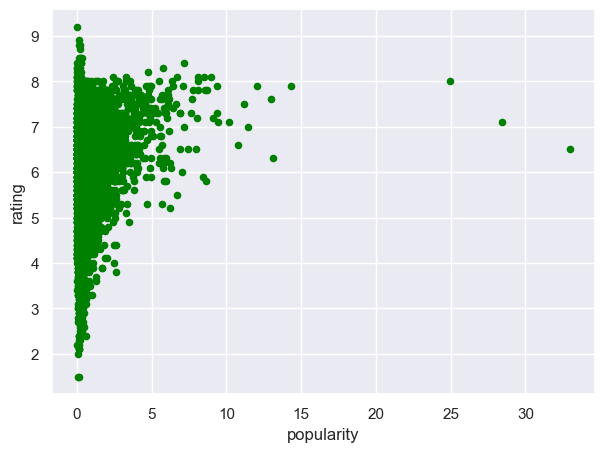

In [282]:

rating_popularity=df.plot.scatter(x='popularity', y='vote_average', c='green', figsize=(7, 5))
rating_popularity.set_ylabel('rating')
plt.show()


*The above figure shows that the rating of a movie is not dependent on its popularity.*

In [283]:
all_genre=['genres']
for i in all_genre:
    df[i] = df[i].apply(lambda x: x.split("|"))
df.head(3)


,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [284]:
df2=df.explode('genres')
df2.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [285]:
popular_genres=df2.groupby(['genres'])['popularity'].sum().sort_values(ascending=True)
popular_genres

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

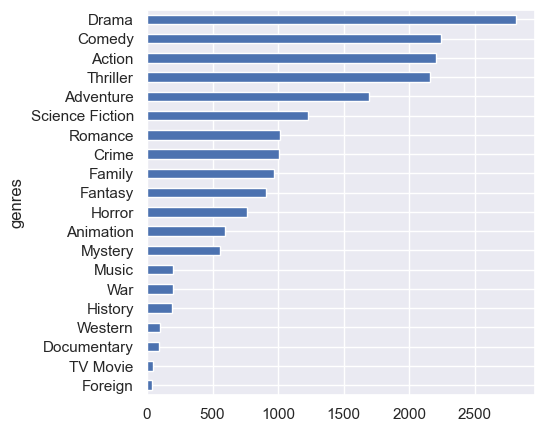

In [286]:
popular_genres.plot.barh(x='popularity', y='genres')
plt.show()

*From the aboce figure we can see which of the genres are the most popular amongst the people*

In [287]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
profit                    int64
roi                     float64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [288]:
df['release_date']=pd.to_datetime(df['release_date'])

C:\Users\shiba\AppData\Local\Temp\ipykernel_18004\642638228.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [289]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
profit                           int64
roi                            float64
original_title                  object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [290]:
df.head(2)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


<Axes: xlabel='runtime'>

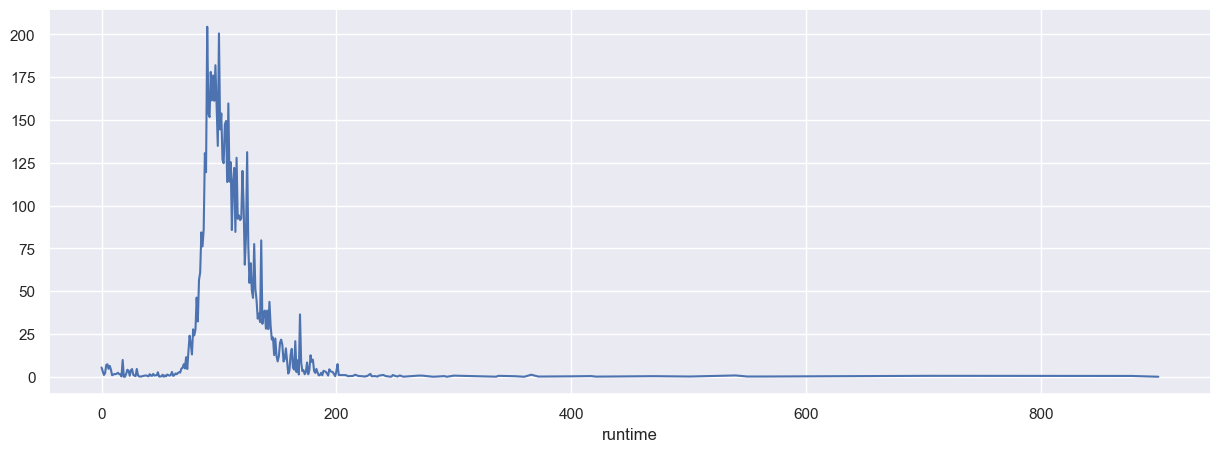

In [291]:
popularity_by_runtime=df.groupby(['runtime'])['popularity'].sum()
sb.set(rc=({'figure.figsize':(15, 5)}))
popularity_by_runtime.plot(kind='line', x='runtime', y='popularity')


*From the above figure we can see that movies having runtime between 50 minutes to 180 minutes are more popular*

In [292]:
temp_df=df[df.keywords!=0]

In [293]:
keywords_individual=['keywords']
for i in keywords_individual:
    temp_df[i]=temp_df[i].apply(lambda x: x.split("|"))
temp_df.head(3)

C:\Users\shiba\AppData\Local\Temp\ipykernel_18004\999492003.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015


In [294]:
edited_temp_df=temp_df.explode('keywords')
keywords_15=edited_temp_df.keywords.value_counts().head(15)

In [295]:
keywords_15.values

array([412, 395, 278, 272, 216, 204, 169, 169, 163, 159, 154, 150, 148,
       140, 137], dtype=int64)

In [296]:
data={
    'keyword':keywords_15.index,
    'value': keywords_15.values
}
keyword_count=pd.DataFrame(data)

In [297]:
keyword_count

,keyword,value
0,woman director,412
1,independent film,395
2,based on novel,278
3,sex,272
4,sport,216
5,murder,204
6,biography,169
7,musical,169
8,new york,163
9,suspense,159


In [298]:
fig= px.treemap(keyword_count, path=['keyword'], values='value')
fig.show()

*The above figure shows the top 15 most used keywords for the movies*

In [299]:
popularity_by_keywords=edited_temp_df.groupby(['keywords'])['popularity'].mean().sort_values(ascending=False).head(10)
popularity_by_keywords

keywords
velociraptor                11.123333
nihilism                     8.950000
woman with gun               8.410000
scene during end credits     7.965000
space colony                 7.460000
evil mastermind              7.400000
times square                 6.910000
descendant                   6.890000
old testament                6.670000
man in drag                  6.670000
Name: popularity, dtype: float64

*The above figure shows top 15 contexts(keywords) which are most popular*